## <center> Линейная регрессия: подход машинного обучения

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# библиотека для машинного обучения sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Считываем данные из файла
df = pd.read_excel('data_house_prices_2_clean.xlsx')
df

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,380000,8450,2003,2003,196,8,2996.000000,20081
1,181500,9600,1976,1976,0,6,7606.000000,15171
2,223500,11250,2001,2002,162,6,5856.000000,17368
3,140000,9550,1915,1970,0,7,4789.000000,21808
4,250000,14260,2000,2000,350,9,1248.000000,16240
...,...,...,...,...,...,...,...,...
95,185000,9765,1993,1993,68,6,3950.000000,20853
96,214000,10264,1999,1999,183,6,4182.000000,12897
97,94750,10921,1965,1965,48,6,3763.429695,25023
98,83000,10625,1920,1950,0,5,203.000000,23344


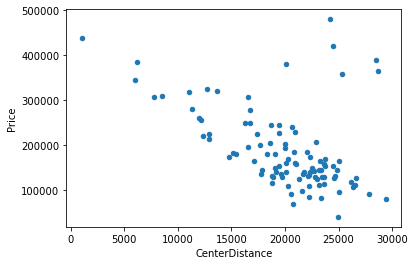

In [170]:
df.plot(x='CenterDistance', y='Price', kind='scatter');

In [254]:
# Находим индексы выбросов и удаляем их
ind = df[(df['CenterDistance']>20000)&(df['Price']>300000)].index
clean_data = df.drop(ind, axis='index')

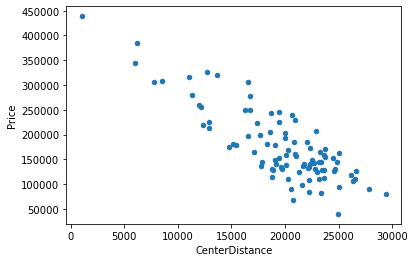

In [255]:
clean_data.plot(x='CenterDistance', y='Price', kind='scatter');

### Разбиение данных на обучающие и тестовые


Разбиение даныне на обучающую и тестовую выборки позволяет тестировать "стабильность" работы модели и контролировать переобучение. 

Разбивать данные на обучающие и тестовые можно с помощью функции **train_test_split** библиотеки **sklearn** . Рассмотрит это на примере построения однофакторной линейной регрессии - зависимость цены жилья от расстояния до центра.

In [3]:
from sklearn.model_selection import train_test_split

In [256]:
X = clean_data[['CenterDistance']]
y = clean_data['Price']

Разбиваем данные на обучающие и тестовые. Параметр **random_state** фиксирует случайность разбиения - обеспечивает, чтобы при повторном разбиении получить одинаковые выборки

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,CenterDistance
11,5997
47,16757
85,12012
28,22865
93,22214
...,...
60,23606
71,23639
14,20983
92,24998


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(X_train, y_train)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_train = reg_model.predict(X_train)

# __Смотрим метрики качества__
print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(X_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.6728970503721794
Mean absolute error (MAE) 36416.157857935934
__________________________________________________
Метрики на тесте:
R2:  0.7403680021440655
Mean absolute error (MAE) 26267.662211077215


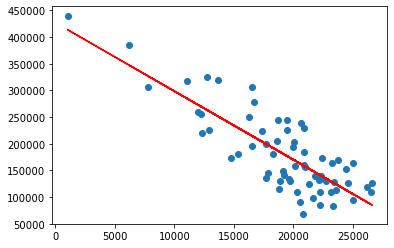

In [290]:
plt.scatter(X_train['CenterDistance'].values, y_train)
plt.plot(X_train['CenterDistance'], pred_train, color='red')

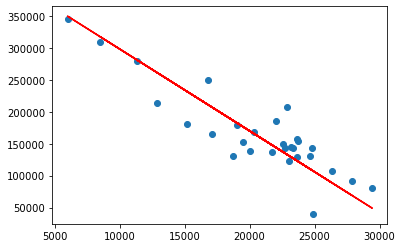

In [291]:
plt.scatter(X_test['CenterDistance'].values, y_test);
plt.plot(X_test['CenterDistance'], pred_test, color='red');

Построим модель на данных с выбросами

In [341]:
X = df[['CenterDistance']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

# создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(X_train, y_train)

# Делаем предказание, применяя метод predict()б и сохраняем его в отдельную переменную
pred_train = reg_model.predict(X_train)

# __Смотрим метрики качества__
print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(X_test)

print('\n Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.24951197324546848
Mean absolute error (MAE) 54830.764720132815

 Метрики на тесте:
R2:  -0.10253516143037977
Mean absolute error (MAE) 54723.293268065856


C R-квадрат на самом деле не все так просто! Он может быть отрицательным, когда мы бьем данные на трейн и тест.

$$R^2 = 1 - \frac{\sum_{i}^{}(y_i-\hat{y_i})^2}{\sum_{i}^{}(y_i - \bar{y_i})^2}$$

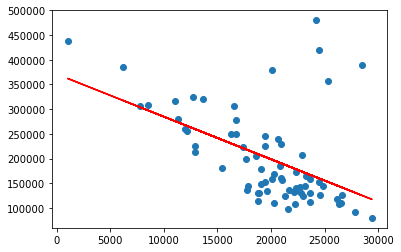

In [303]:
plt.scatter(X_train['CenterDistance'].values, y_train);
plt.plot(X_train['CenterDistance'], pred_train, color='red');

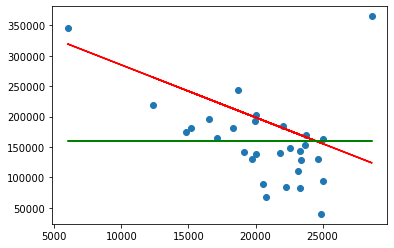

In [342]:
mean_pred = [y_test.mean()] * y_test.size

plt.scatter(X_test['CenterDistance'].values, y_test);
plt.plot(X_test['CenterDistance'], pred_test, color='red');
plt.plot(X_test['CenterDistance'], mean_pred, color='green');

In [325]:
test_result = pd.DataFrame({'y':y_test, 'y_pred': pred_test})
test_result['(y-y_pred)^2'] = (test_result['y'] - test_result['y_pred'])**2
test_result['(y - y_mean)^2'] = (test_result['y'] - test_result['y'].mean())**2
test_result.head()

,y,y_pred,(y-y_pred)^2,(y - y_mean)^2
17,90000,193689.297651,1.075147e+10,4.962498e+09
23,129900,200951.289057,5.048286e+09,9.329970e+08
1,181500,240323.012061,3.460147e+09,4.433130e+08
44,141000,205806.991149,4.199946e+09,3.781080e+08
55,180500,213250.101106,1.072569e+09,4.022030e+08


In [326]:
test_result['(y-y_pred)^2'].sum() - test_result['(y - y_mean)^2'].sum() 

14693395961.653656

In [327]:
1 - test_result['(y-y_pred)^2'].sum() / test_result['(y - y_mean)^2'].sum() 


-0.10253516143037977